In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data manipulation and analysis
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# **LOADING DATA**

In [ ]:
df=pd.read_csv("insurance.csv")

# **UNDERSTANDING THE STRUCTURE OF DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum(axis=0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# **VISUALIZING DATA**

## Univariate Analysis

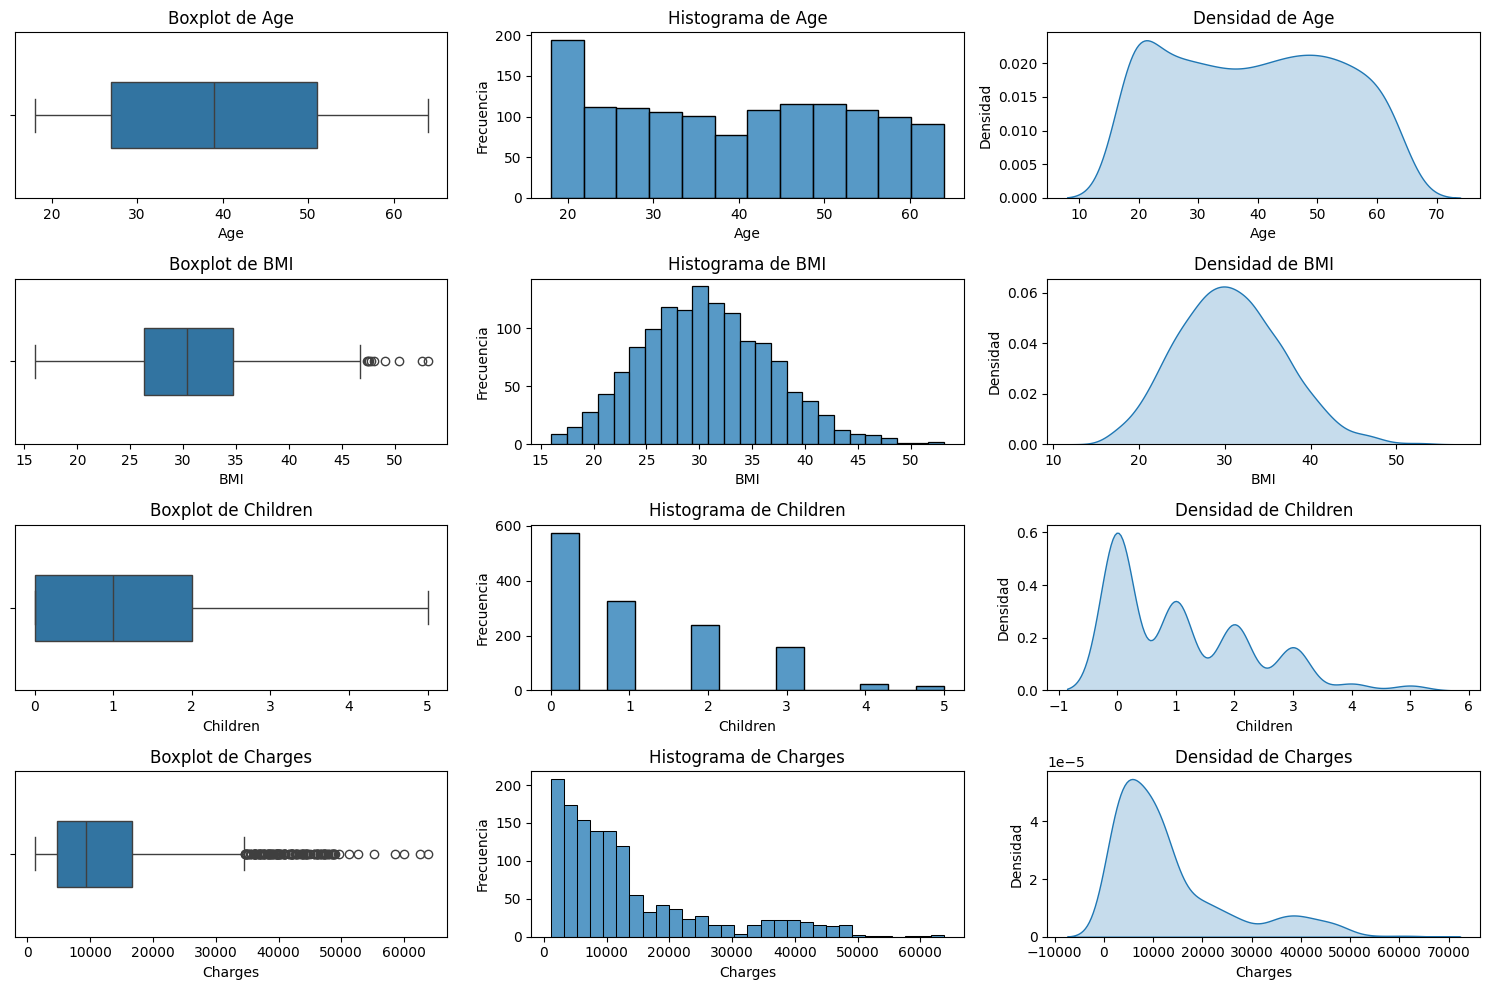

In [ ]:
# List of variables and corresponding titles
variables = ['age', 'bmi', "children",'charges']  
titulos = ['Age', 'BMI', "Children",'Charges']  

# Create subplots with Seaborn
fig, ax = plt.subplots(len(variables), 3, figsize=(15, 10))

for i, var in enumerate(variables):
    var_titulo = titulos[i]

    # boxplot
    sns.boxplot(data=df[var], ax=ax[i, 0], orient='h', width=0.4)
    ax[i, 0].set_xlabel(var_titulo)
    ax[i, 0].set_title(f'Boxplot de {var_titulo}')
    ax[i, 0].grid(False)

    # hHistogram
    sns.histplot(data=df[var], ax=ax[i, 1], kde=False)
    ax[i, 1].set_xlabel(var_titulo)
    ax[i, 1].set_ylabel('Frecuencia')
    ax[i, 1].set_title(f'Histograma de {var_titulo}')
    ax[i, 1].grid(False)

    # Density curve
    sns.kdeplot(data=df[var], ax=ax[i, 2], fill=True)
    ax[i, 2].set_xlabel(var_titulo)
    ax[i, 2].set_ylabel('Densidad')
    ax[i, 2].set_title(f'Densidad de {var_titulo}')
    ax[i, 2].grid(False)

# Adjust spacing between subplots
plt.tight_layout()

plt.show()


In [ ]:
from scipy.stats import skew, kurtosis

In [ ]:

# Calculate Symmetry
simetria = skew(df['charges'].dropna())

# Calculate Kurtosis
curtosis = kurtosis(df['charges'].dropna())

1.5141797118745743

In [ ]:
simetria

1.5141797118745743

In [ ]:
curtosis

1.595821363956751

<Axes: xlabel='charges', ylabel='Density'>

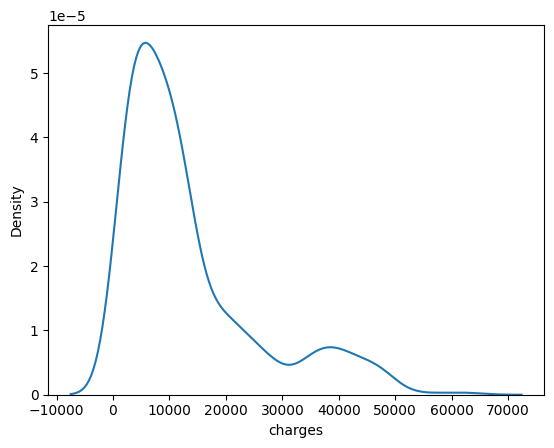

In [ ]:
sns.kdeplot(df['charges'])

## Bivariate Analysis

### Age vs Charges

<ipython-input-91-a9ad6f77a37e>:10: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=var, y='charges', hue='smoker', palette=palette, ax=ax)


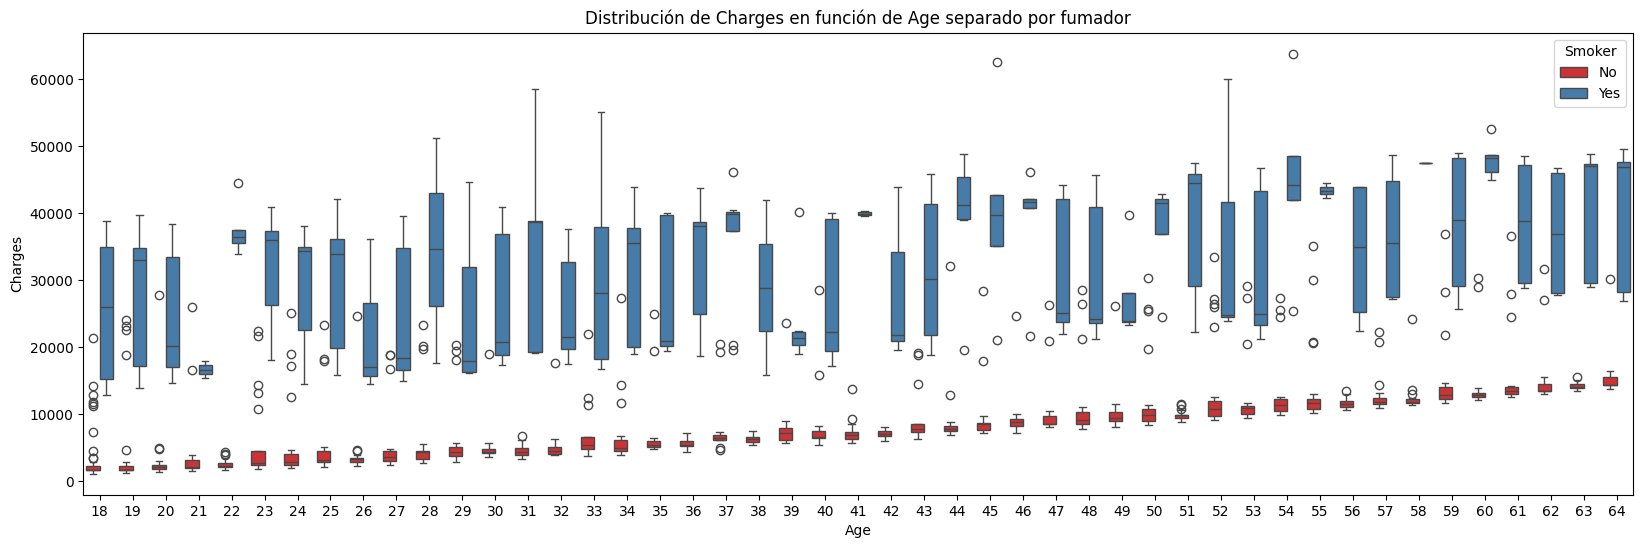

In [ ]:
var = 'age'
var_title = 'Age'

fig, ax = plt.subplots(figsize=(20, 6))
palette = sns.color_palette("Set1")

sns.boxplot(data=df, x=var, y='charges', hue='smoker', palette=palette, ax=ax)

ax.set_xlabel(var_title)
ax.set_ylabel('Charges')  
ax.set_title(f'Distribución de Charges en función de {var_title} separado por fumador')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Smoker')
ax.grid(False)  

plt.show()

   age age_group
0   19   Jovenes
1   18   Jovenes
2   28   Jovenes
3   33   Jovenes
4   32   Jovenes


<ipython-input-12-b8b39718fd61>:9: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.boxplot(data=df2, x='age_group', y='charges', hue='smoker', palette=palette, ax=ax)


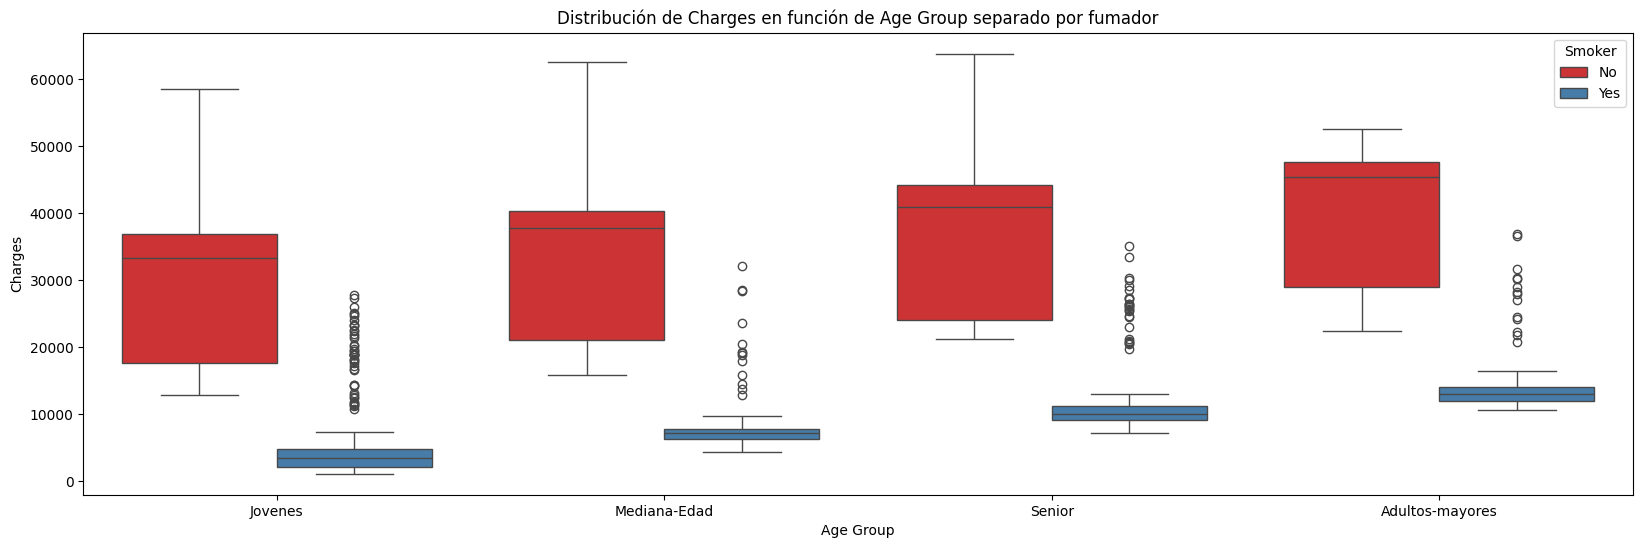

In [ ]:
# Create age bins
df2=df.copy()
bins = [0,35, 45, 55, 65]  # Adjust these values as needed

df2['age_group'] = pd.cut(df['age'], bins=bins, labels=["Jovenes", "Mediana-Edad", "Senior", "Adultos-mayores"])
print(df2[['age', 'age_group']].head())
fig, ax = plt.subplots(figsize=(20, 6))
palette = sns.color_palette("Set1")
sns.boxplot(data=df2, x='age_group', y='charges', hue='smoker', palette=palette, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Charges')
ax.set_title('Distribución de Charges en función de Age Group separado por fumador')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Smoker')
ax.grid(False)  

plt.show()


In [ ]:
df2

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Mediana-Edad
1,18,male,33.770,1,no,southeast,1725.55230,Jovenes
2,28,male,33.000,3,no,southeast,4449.46200,Mediana-Edad
3,33,male,22.705,0,no,northwest,21984.47061,Senior
4,32,male,28.880,0,no,northwest,3866.85520,Senior
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Senior
1334,18,female,31.920,0,no,northeast,2205.98080,Jovenes
1335,18,female,36.850,0,no,southeast,1629.83350,Jovenes
1336,21,female,25.800,0,no,southwest,2007.94500,Mediana-Edad


<ipython-input-94-8d9df7caa579>:10: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.scatterplot(data=df, x=var, y='charges', hue='smoker', palette=palette, ax=ax)


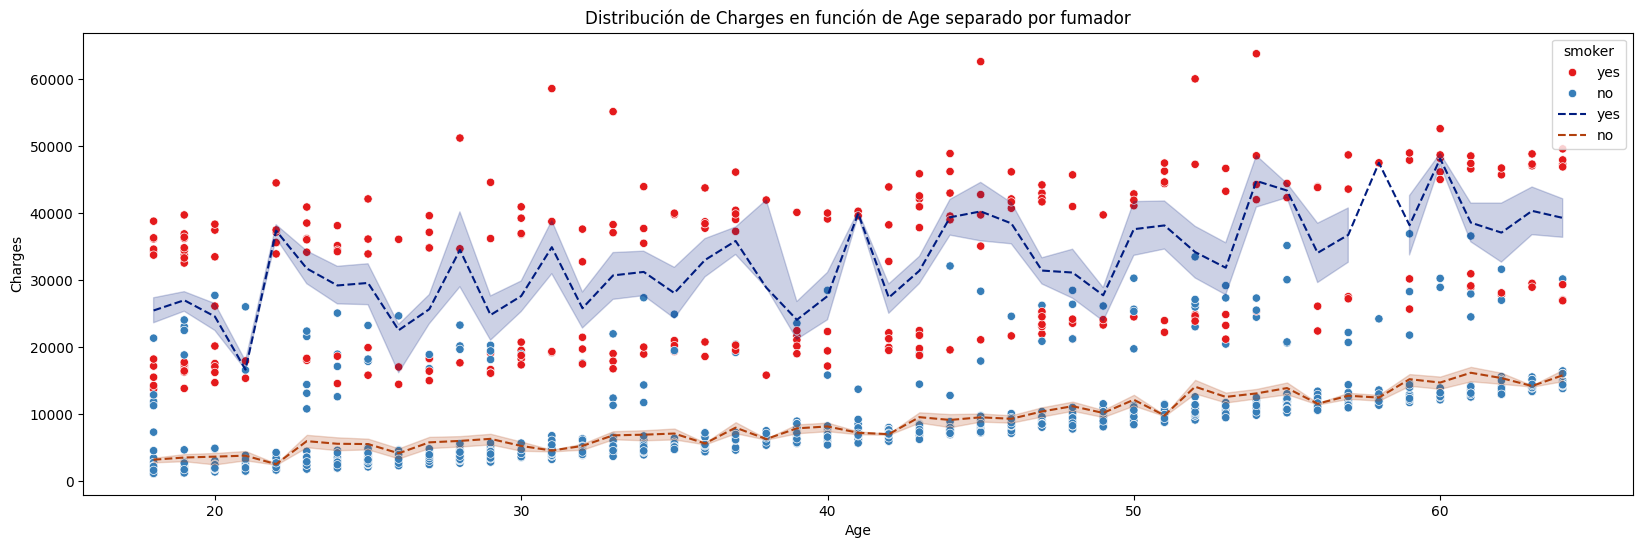

In [ ]:
var = 'age'
var_title = 'Age'

fig, ax = plt.subplots(figsize=(20, 6))
palette = sns.color_palette("Set1")

# Scatter plot of charges vs. age, separated by smoke
sns.scatterplot(data=df, x=var, y='charges', hue='smoker', palette=palette, ax=ax)

ax.set_xlabel(var_title)
ax.set_ylabel('Charges')  
ax.set_title(f'Distribución de Charges en función de {var_title} separado por fumador')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['No', 'Yes'], title='Smoker')
ax.grid(False)

sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='dark', estimator='mean', errorbar=('ci', 50),linestyle='--', ax=plt.gca())

plt.show()


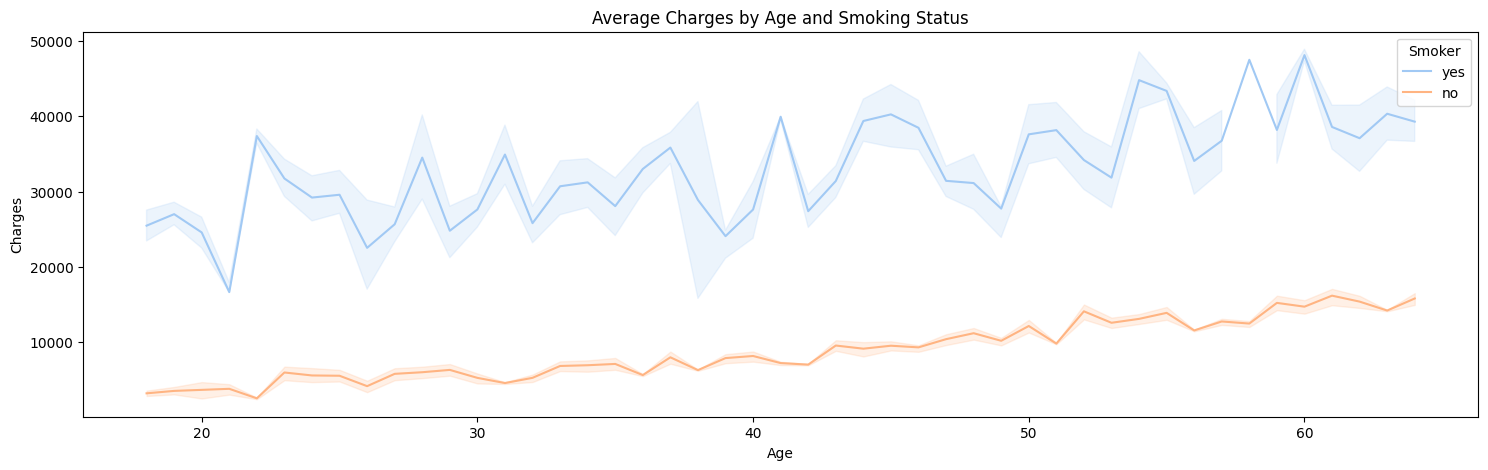

In [ ]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df, x='age', y='charges', hue='smoker', palette='pastel', estimator='mean', errorbar=('ci', 50))
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Average Charges by Age and Smoking Status')
plt.legend(title='Smoker')
plt.grid(False)
plt.show()

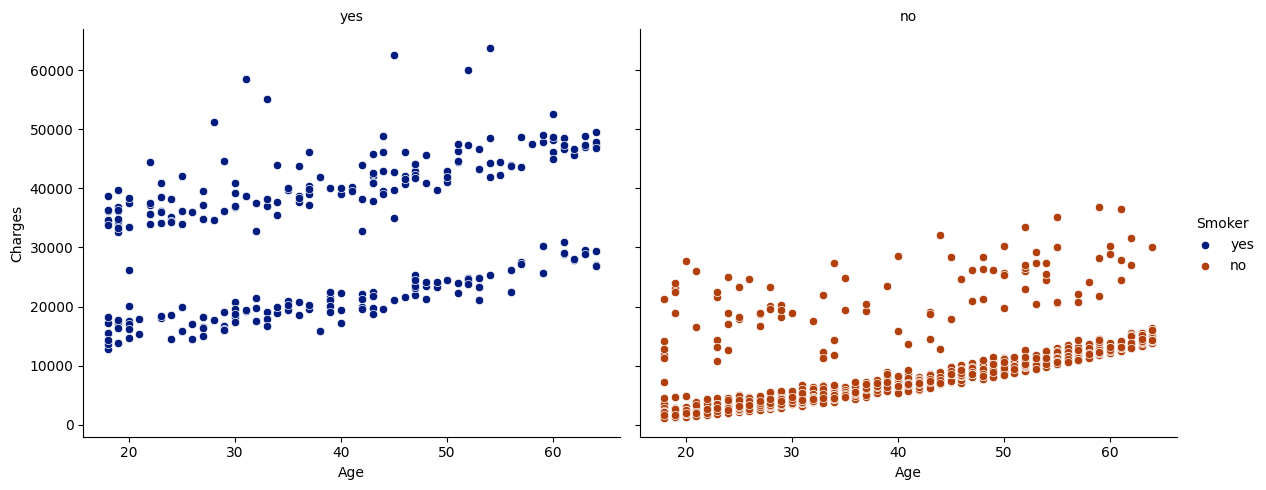

In [ ]:
g = sns.FacetGrid(df, col='smoker', hue='smoker', palette='dark', height=5, aspect=1.2)
g.map(sns.scatterplot, 'age', 'charges')
g.add_legend(title='Smoker')
g.set_axis_labels('Age', 'Charges')
g.set_titles(col_template="{col_name}")
plt.show()


### Smoker vs Charges

<ipython-input-97-5acf5eb4a2ef>:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.histplot(data=df, x=var, hue='smoker', multiple='stack', kde=False, alpha=0.7, palette=palette, ax=ax[0])
<ipython-input-97-5acf5eb4a2ef>:19: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.kdeplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[1])
<ipython-input-97-5acf5eb4a2ef>:26: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[2])


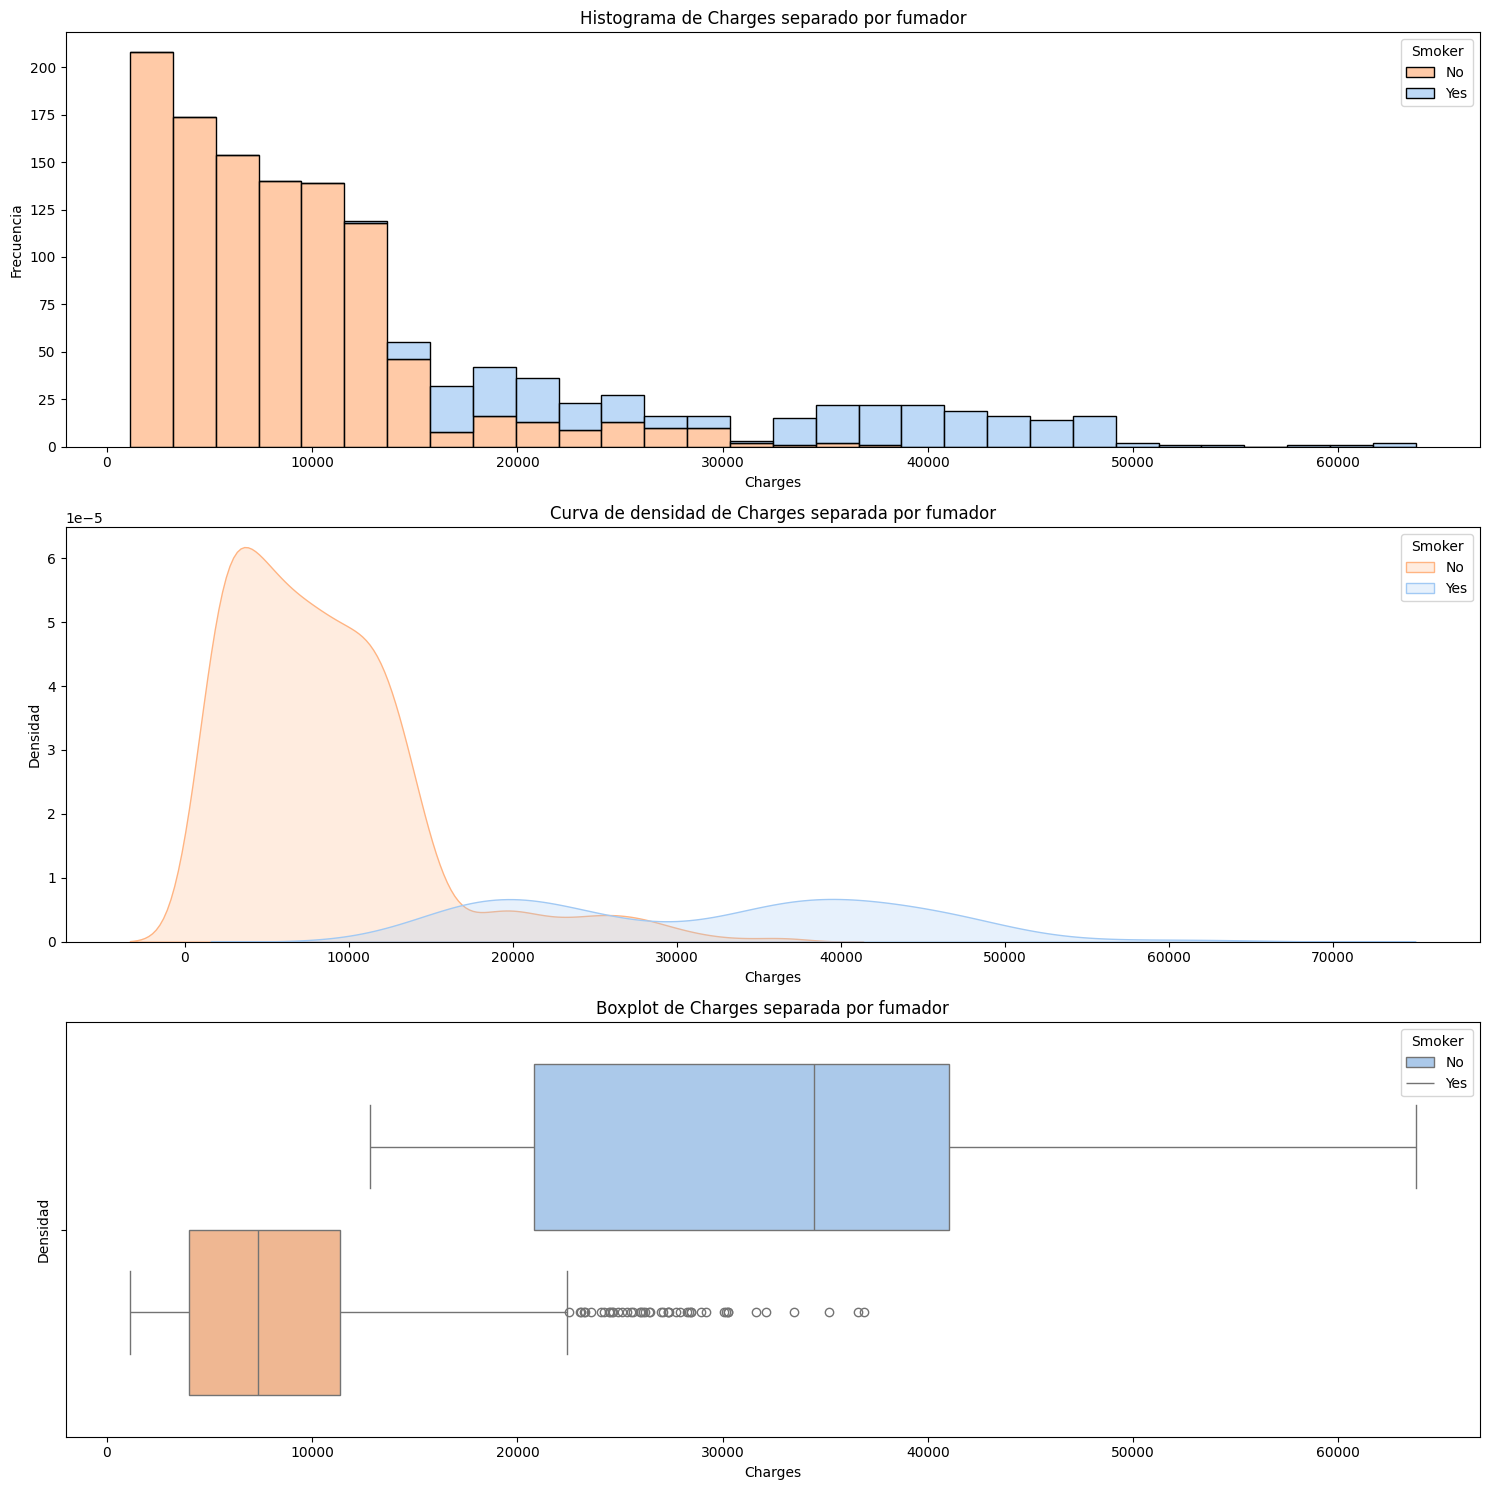

In [ ]:

var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(3, 1, figsize=(15, 15))
palette = sns.color_palette("pastel")

# Histogram separated by 'smoker
sns.histplot(data=df, x=var, hue='smoker', multiple='stack', kde=False, alpha=0.7, palette=palette, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')
ax[0].set_title(f'Histograma de {var_title} separado por fumador')
ax[0].legend(title='Smoker', labels=['No', 'Yes'])
ax[0].grid(False) # Remove grid

# Density curve separated by 'smoker
sns.kdeplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].set_title(f'Curva de densidad de {var_title} separada por fumador')
ax[1].legend(title='Smoker', labels=['No', 'Yes'])
ax[1].grid(False) # Remove grid

sns.boxplot(data=df, x=var, hue='smoker', palette=palette, fill=True, ax=ax[2])
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')
ax[2].set_title(f'Boxplot de {var_title} separada por fumador')
ax[2].legend(title='Smoker', labels=['No', 'Yes'])
ax[2].grid(False) # Remove grid

plt.tight_layout()

plt.show()


### Sex vs Charges

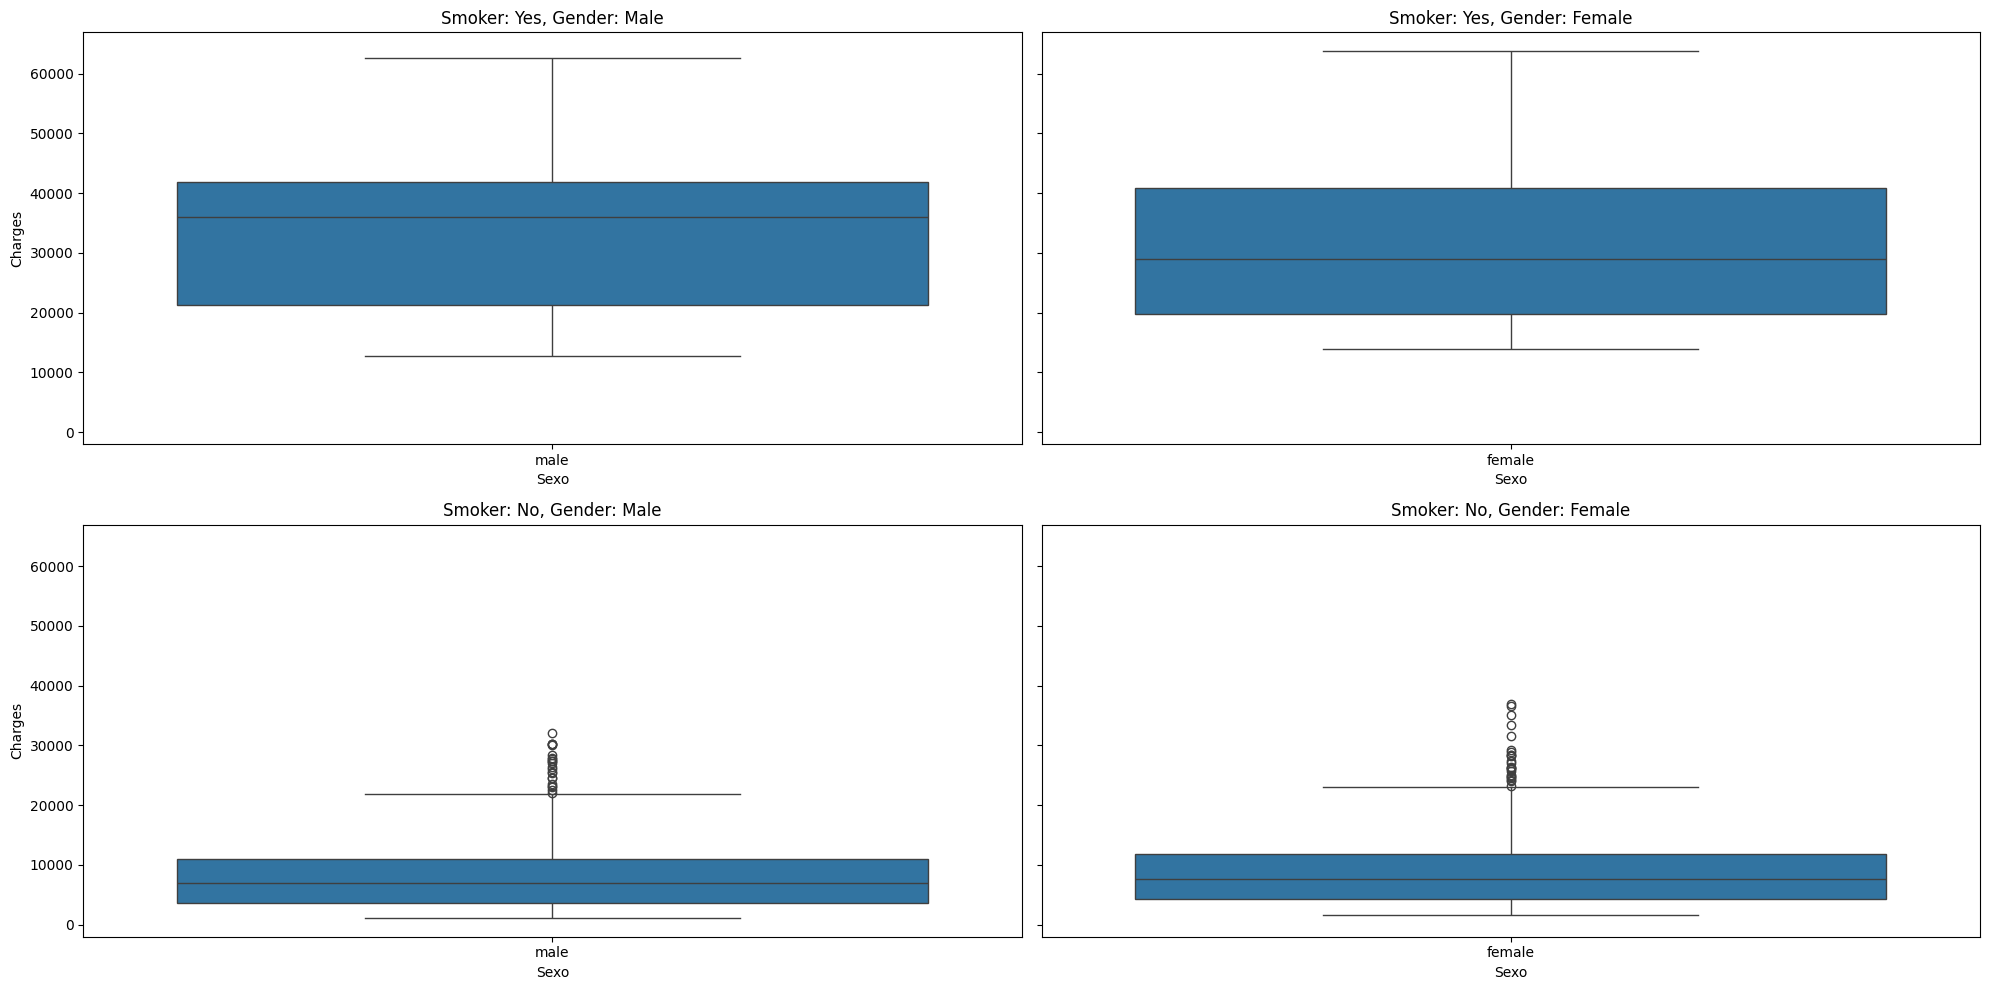

In [ ]:
var = 'sex'
var_title = 'Sexo'

fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharey=True)  # Two rows and two columns

palette = sns.color_palette("Set1")

# Filter the data by smoker status and gender for each plot
df_smoker_yes_male = df[(df['smoker'] == 'yes') & (df['sex'] == 'male')]
df_smoker_yes_female = df[(df['smoker'] == 'yes') & (df['sex'] == 'female')]
df_smoker_no_male = df[(df['smoker'] == 'no') & (df['sex'] == 'male')]
df_smoker_no_female = df[(df['smoker'] == 'no') & (df['sex'] == 'female')]

sns.boxplot(data=df_smoker_yes_male, x=var, y='charges', ax=ax[0, 0])
ax[0, 0].set_xlabel(var_title)
ax[0, 0].set_ylabel('Charges')
ax[0, 0].set_title('Smoker: Yes, Gender: Male')
ax[0, 0].grid(False)

sns.boxplot(data=df_smoker_yes_female, x=var, y='charges', ax=ax[0, 1])
ax[0, 1].set_xlabel(var_title)
ax[0, 1].set_ylabel('Charges')
ax[0, 1].set_title('Smoker: Yes, Gender: Female')
ax[0, 1].grid(False)

sns.boxplot(data=df_smoker_no_male, x=var, y='charges', ax=ax[1, 0])
ax[1, 0].set_xlabel(var_title)
ax[1, 0].set_ylabel('Charges')
ax[1, 0].set_title('Smoker: No, Gender: Male')
ax[1, 0].grid(False)

sns.boxplot(data=df_smoker_no_female, x=var, y='charges', ax=ax[1, 1])
ax[1, 1].set_xlabel(var_title)
ax[1, 1].set_ylabel('Charges')
ax[1, 1].set_title('Smoker: No, Gender: Female')
ax[1, 1].grid(False)

plt.tight_layout()

plt.show()



### BMI vs Charges

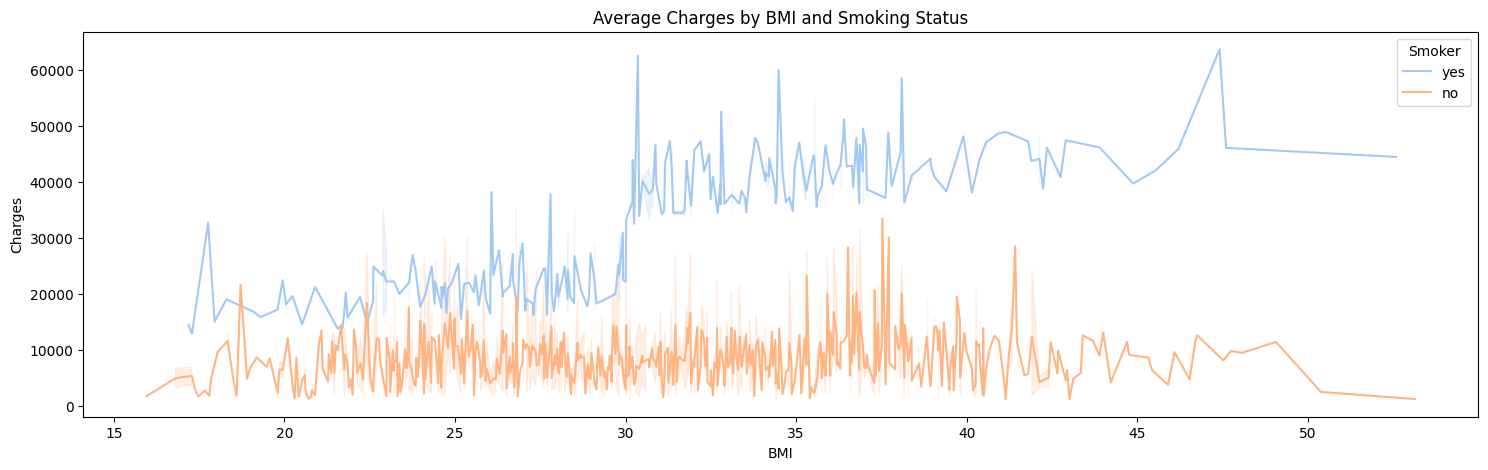

In [ ]:
plt.figure(figsize=(18, 5))
sns.lineplot(data=df, x='bmi', y='charges', hue='smoker', palette='pastel')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average Charges by BMI and Smoking Status')
plt.legend(title='Smoker')
plt.grid(False)
plt.show()

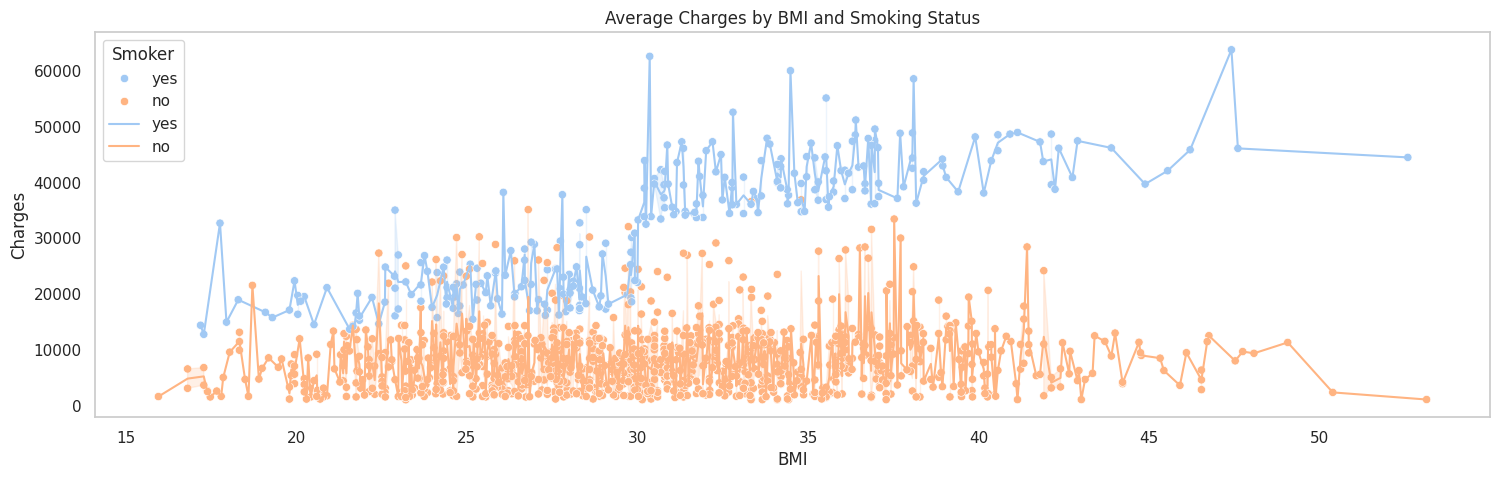

In [ ]:
plt.figure(figsize=(18, 5))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='pastel')
sns.lineplot(data=df, x='bmi', y='charges', hue='smoker', palette='pastel')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Average Charges by BMI and Smoking Status')
plt.legend(title='Smoker')
plt.grid(False)
plt.show()

### Region vs Charges

<ipython-input-99-e3baafbde5b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="region", y="charges", palette="pastel")


Text(0, 0.5, 'Charges')

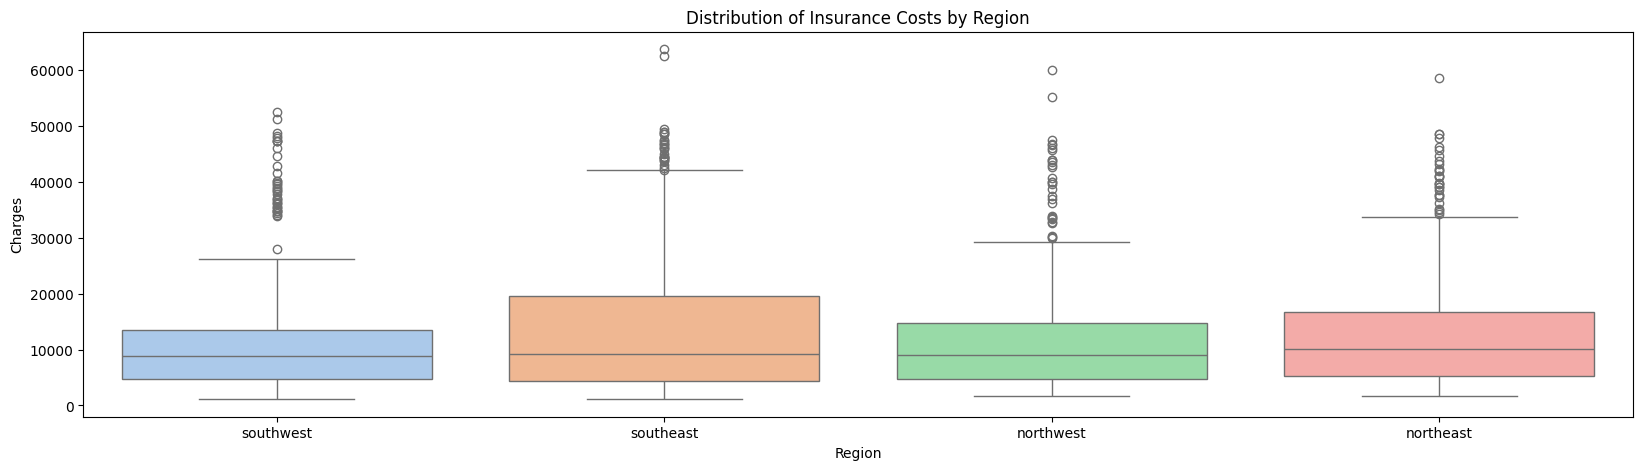

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df, x="region", y="charges", palette="pastel")
plt.title("Distribution of Insurance Costs by Region")
plt.xlabel("Region")
plt.ylabel("Charges")

<ipython-input-100-f1882aba5780>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_costs_smoker_yes, x='region', y='charges', palette="pastel", ax=ax[0])
<ipython-input-100-f1882aba5780>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_costs_smoker_no, x='region', y='charges', palette="pastel", ax=ax[1])


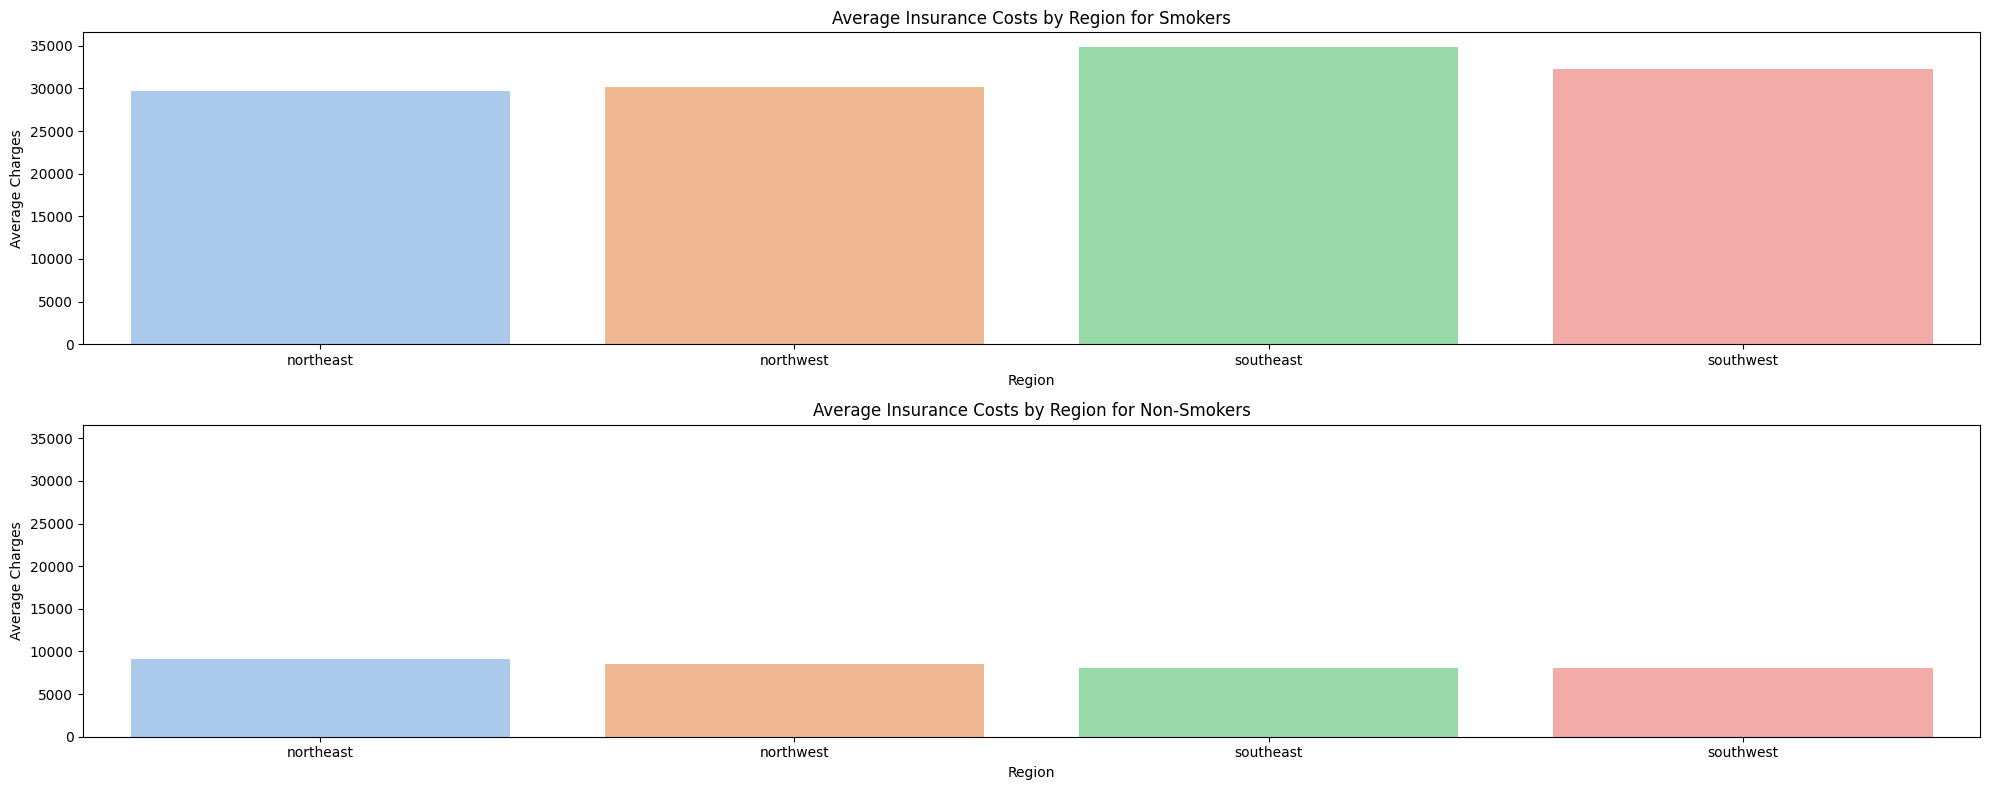

In [ ]:

# Calculate the average insurance costs by region and smoker status
avg_costs = df.groupby(['region', 'smoker'])['charges'].mean().reset_index()

# Filter the data by smoker status
avg_costs_smoker_yes = avg_costs[avg_costs['smoker'] == 'yes']
avg_costs_smoker_no = avg_costs[avg_costs['smoker'] == 'no']

fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharey=True)

# Bar chart for smokers
sns.barplot(data=avg_costs_smoker_yes, x='region', y='charges', palette="pastel", ax=ax[0])
ax[0].set_title('Average Insurance Costs by Region for Smokers')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Average Charges')

# Bar chart for non-smokers
sns.barplot(data=avg_costs_smoker_no, x='region', y='charges', palette="pastel", ax=ax[1])
ax[1].set_title('Average Insurance Costs by Region for Non-Smokers')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Average Charges')

plt.tight_layout()
plt.show()


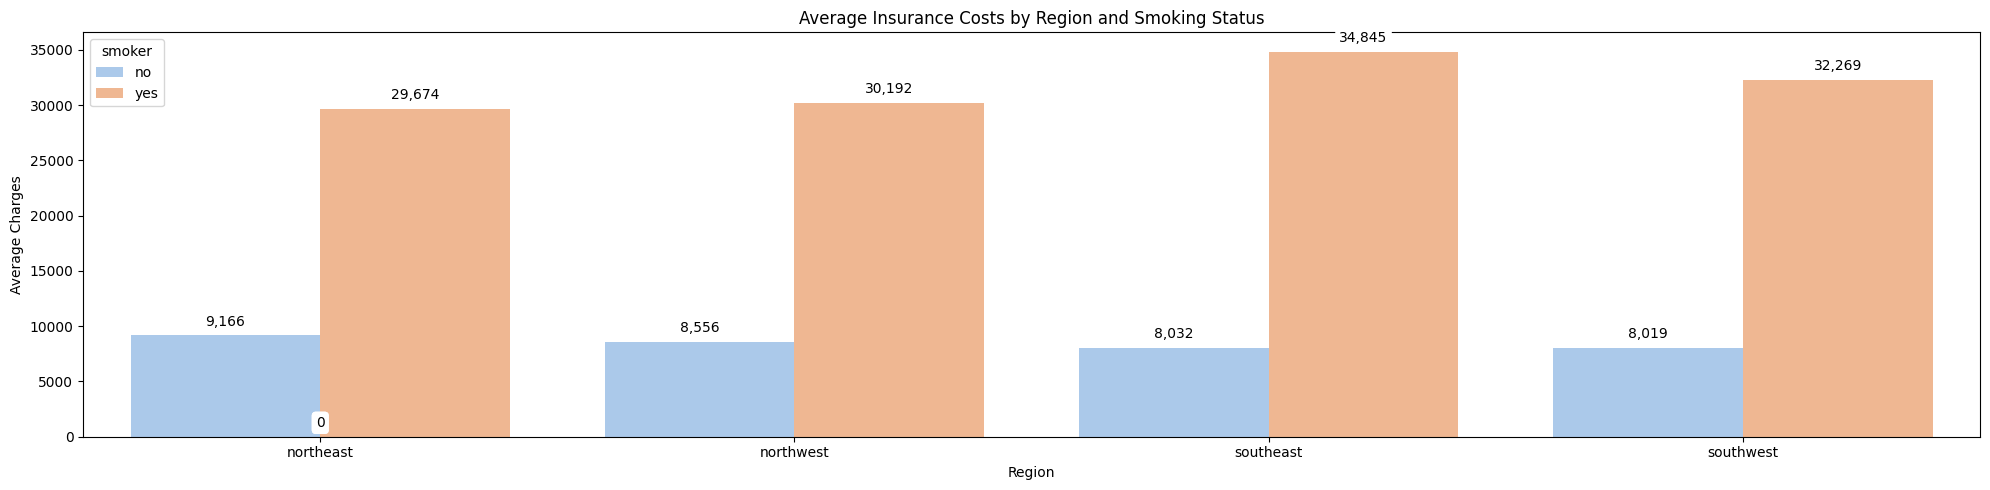

In [ ]:

# Calculate the average insurance costs by region and smoker status
avg_costs = df.groupby(['region', 'smoker'])['charges'].mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 5))
sns.barplot(data=avg_costs, x='region', y='charges', hue='smoker', palette="pastel", ax=ax)
ax.set_title('Average Insurance Costs by Region and Smoking Status')
ax.set_xlabel('Region')
ax.set_ylabel('Average Charges')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',  
                (p.get_x() + p.get_width() / 2., height),  
                ha='center', va='center',
                xytext=(0, 10),  
                textcoords='offset points',
                fontsize=10,  
                color='black',  
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white')  
               )


plt.tight_layout()
plt.show()


### Sexo+Fumador vs Charges

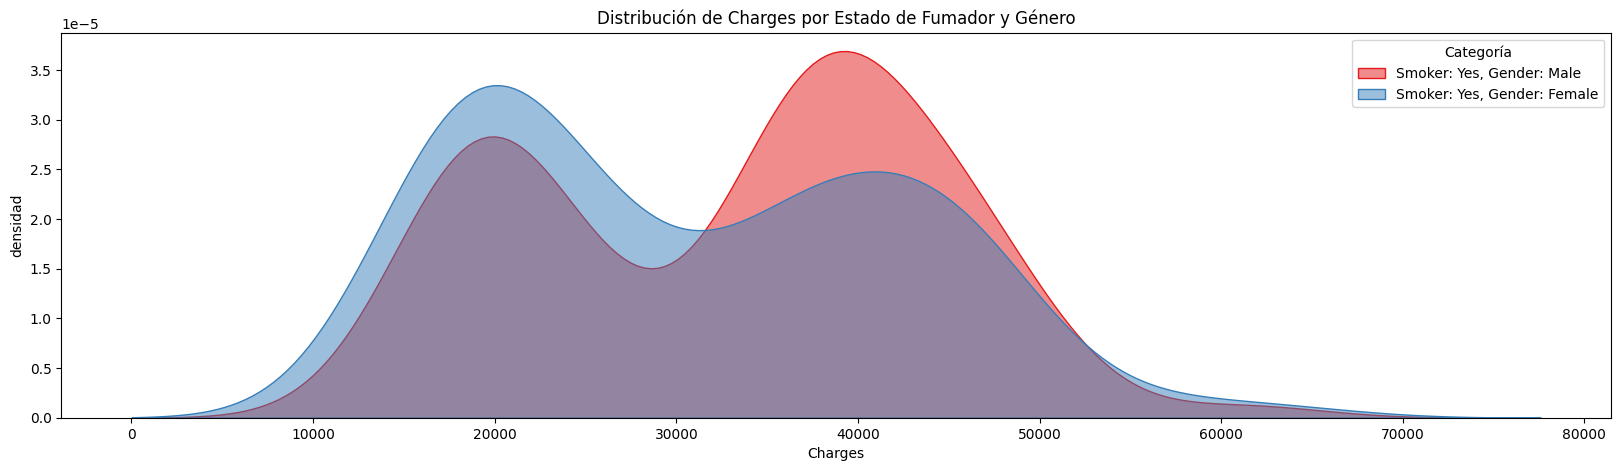

In [ ]:

var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(figsize=(20, 5))
palette = sns.color_palette("Set1")

# Density plot for each group with overlap
sns.kdeplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'male')], x=var, fill=True, ax=ax, color=palette[0], alpha=0.5, label='Smoker: Yes, Gender: Male')
sns.kdeplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'female')], x=var, fill=True, ax=ax, color=palette[1], alpha=0.5, label='Smoker: Yes, Gender: Female')

ax.set_xlabel(var_title)
ax.set_ylabel('densidad')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

plt.show()




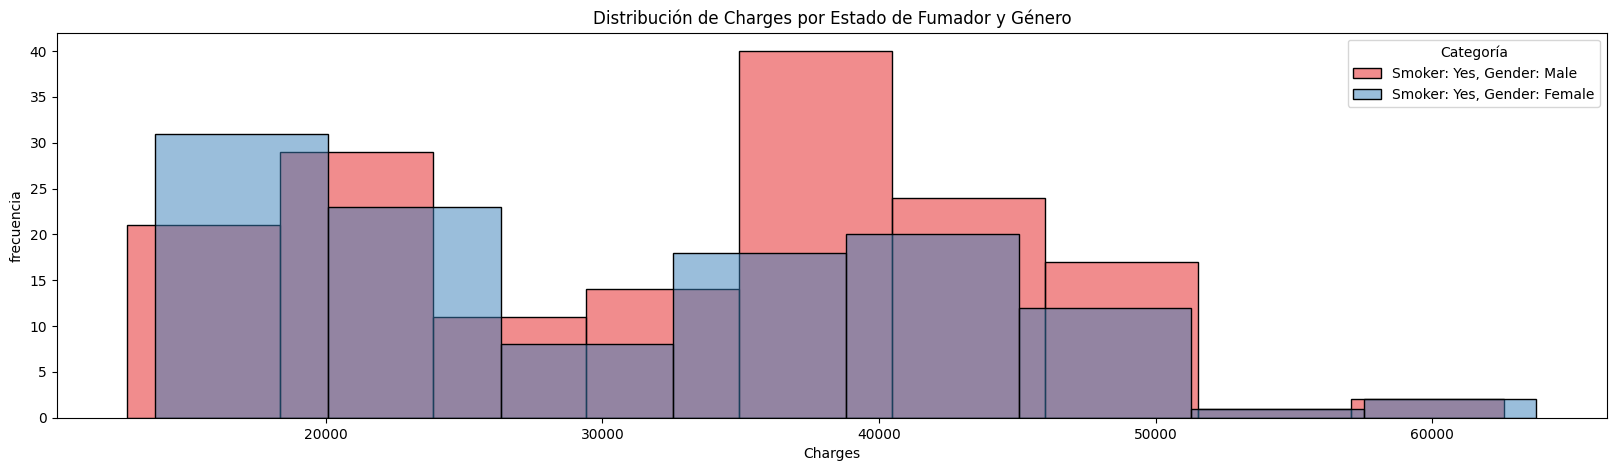

In [ ]:

var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(figsize=(20, 5))
palette = sns.color_palette("Set1")

# Density plot for each group with overlapping
sns.histplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'male')], x=var, fill=True, ax=ax, color=palette[0], alpha=0.5, label='Smoker: Yes, Gender: Male')
sns.histplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'female')], x=var, fill=True, ax=ax, color=palette[1], alpha=0.5, label='Smoker: Yes, Gender: Female')

ax.set_xlabel(var_title)
ax.set_ylabel('frecuencia')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

plt.show()


- Among smokers, men have slightly higher average expenses than women.

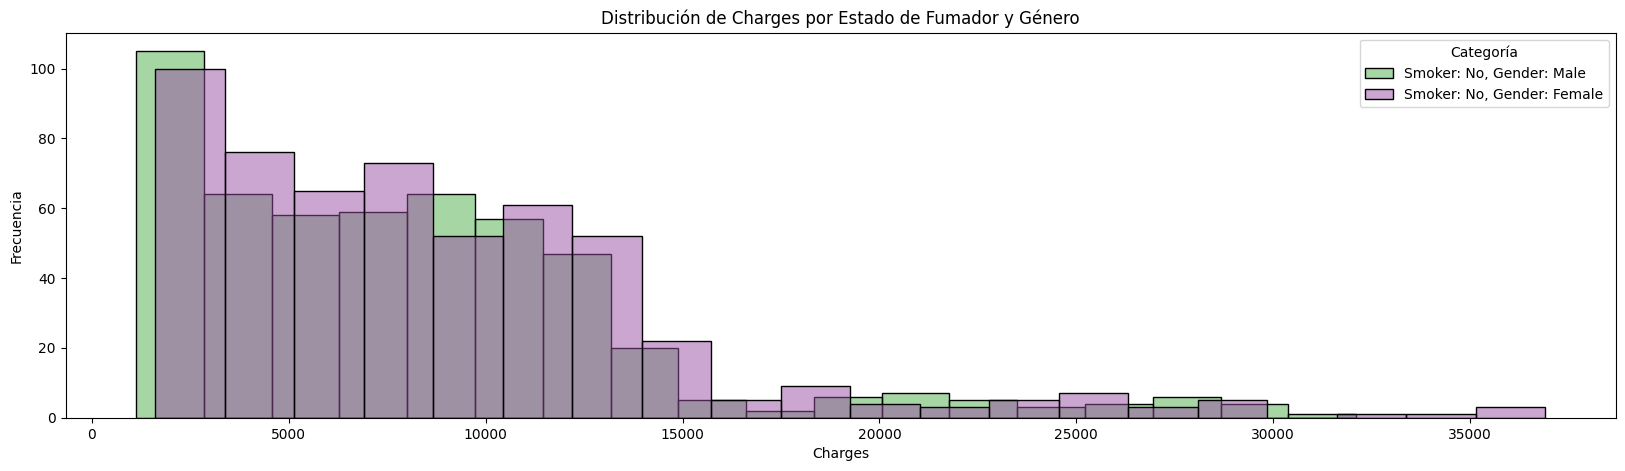

In [ ]:
var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(figsize=(20, 5))
palette = sns.color_palette("Set1")

# Density plot for each group with overlaping
sns.histplot(data=df[(df['smoker'] == 'no') & (df['sex'] == 'male')], x=var, fill=True, ax=ax, color=palette[2], alpha=0.5, label='Smoker: No, Gender: Male')
sns.histplot(data=df[(df['smoker'] == 'no') & (df['sex'] == 'female')], x=var, fill=True, ax=ax, color=palette[3], alpha=0.5, label='Smoker: No, Gender: Female')

ax.set_xlabel(var_title)
ax.set_ylabel('Frecuencia')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

plt.show()


- The plot also shows that non-smoking women have slightly higher average expenses than men, whereas among smokers, men have slightly higher average expenses than women.

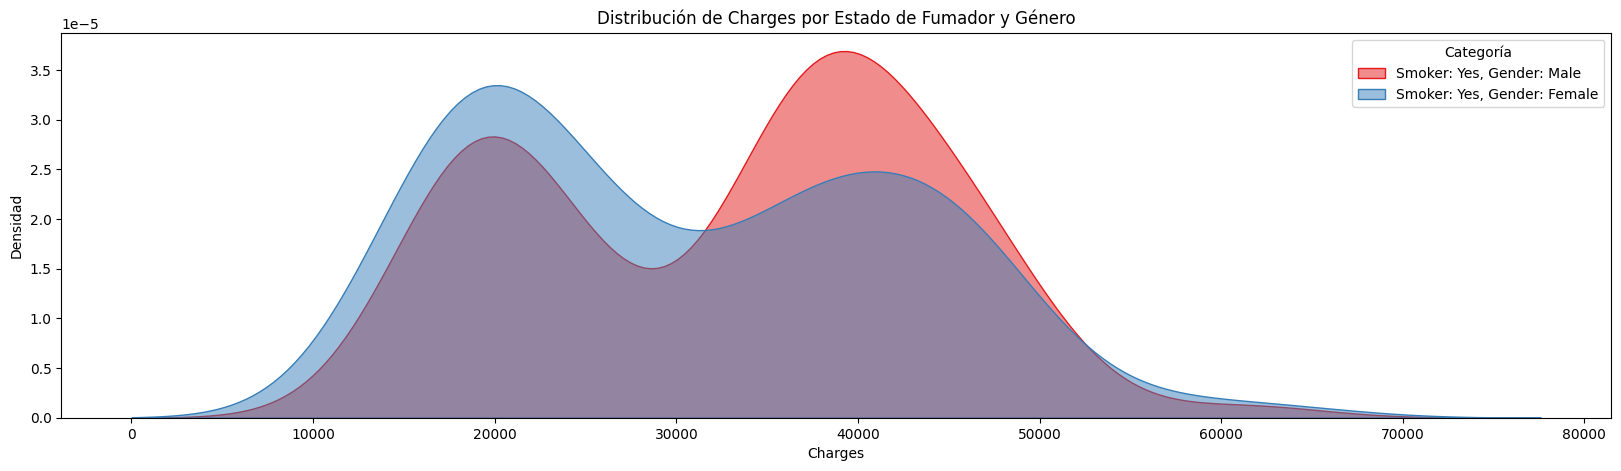

In [ ]:
var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(figsize=(20, 5))
palette = sns.color_palette("Set1")

# Density plot for each group with overlap
sns.kdeplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'male')], x=var, fill=True, ax=ax, color=palette[0], alpha=0.5, label='Smoker: Yes, Gender: Male')
sns.kdeplot(data=df[(df['smoker'] == 'yes') & (df['sex'] == 'female')], x=var, fill=True, ax=ax, color=palette[1], alpha=0.5, label='Smoker: Yes, Gender: Female')

ax.set_xlabel(var_title)
ax.set_ylabel('frecuencia')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

ax.set_xlabel(var_title)
ax.set_ylabel('Densidad')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

plt.show()


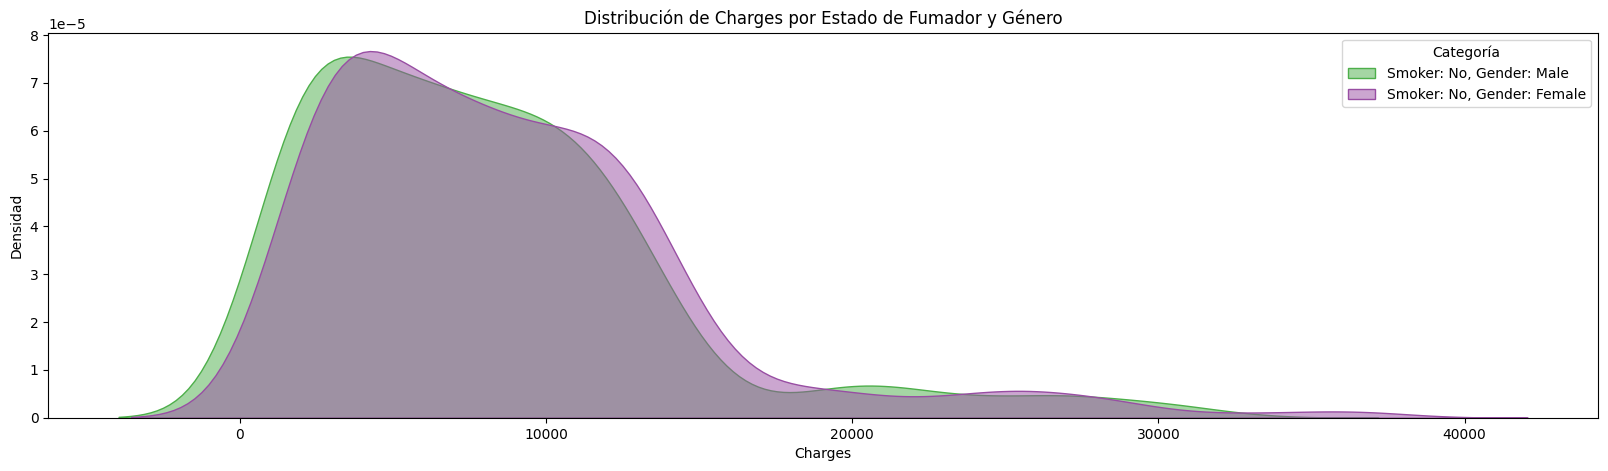

In [ ]:
var = 'charges'
var_title = 'Charges'

fig, ax = plt.subplots(figsize=(20, 5))
palette = sns.color_palette("Set1")

# Density plot for each group with overlapping
sns.kdeplot(data=df[(df['smoker'] == 'no') & (df['sex'] == 'male')], x=var, fill=True, ax=ax, color=palette[2], alpha=0.5, label='Smoker: No, Gender: Male')
sns.kdeplot(data=df[(df['smoker'] == 'no') & (df['sex'] == 'female')], x=var, fill=True, ax=ax, color=palette[3], alpha=0.5, label='Smoker: No, Gender: Female')

ax.set_xlabel(var_title)
ax.set_ylabel('Densidad')
ax.set_title(f'Distribución de {var_title} por Estado de Fumador y Género')
ax.legend(title='Categoría')
ax.grid(False)

plt.show()


In [ ]:
avg_costs = df.groupby(['sex', 'smoker'])['charges'].mean().reset_index()
avg_costs

,sex,smoker,charges
0,female,no,8762.297300
1,female,yes,30678.996276
2,male,no,8087.204731
3,male,yes,33042.005975


In [ ]:
avg_costs = df.groupby(['sex', 'smoker', "region"])['charges'].mean().reset_index()
avg_costs

,sex,smoker,region,charges
0,female,no,northeast,9640.426984
1,female,no,northwest,8786.998679
2,female,no,southeast,8440.205552
3,female,no,southwest,8234.091260
4,female,yes,northeast,28032.046398
5,female,yes,northwest,29670.824946
6,female,yes,southeast,33034.820716
7,female,yes,southwest,31687.988430
8,male,no,northeast,8664.042222
9,male,no,northwest,8320.689321


## Multivariate analysis

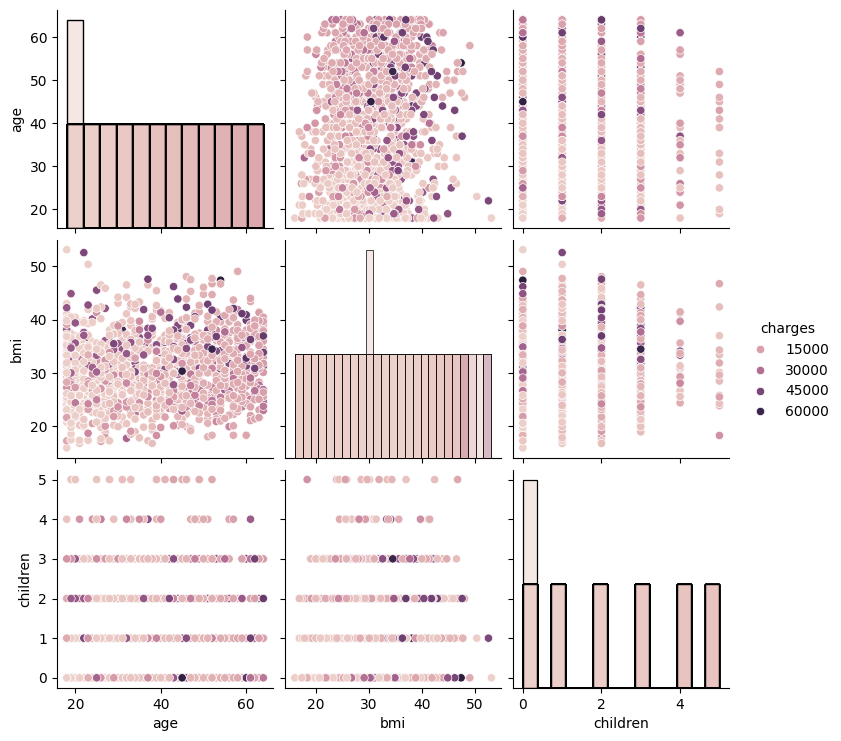

In [ ]:
# Pairplot

sns.pairplot(df, hue="charges", diag_kind="hist")  

In [ ]:

df['female'] = df['sex'].apply(lambda x: 1 if x=='female' else 0)
df['smoker_yes'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df.drop(['sex', 'smoker'], axis=1, inplace=True)



In [ ]:
df

,age,bmi,children,region,charges,female,smoker_yes
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,0
1334,18,31.920,0,northeast,2205.98080,1,0
1335,18,36.850,0,southeast,1629.83350,1,0
1336,21,25.800,0,southwest,2007.94500,1,0


Text(0.5, 1.0, 'Correlation Matrix')

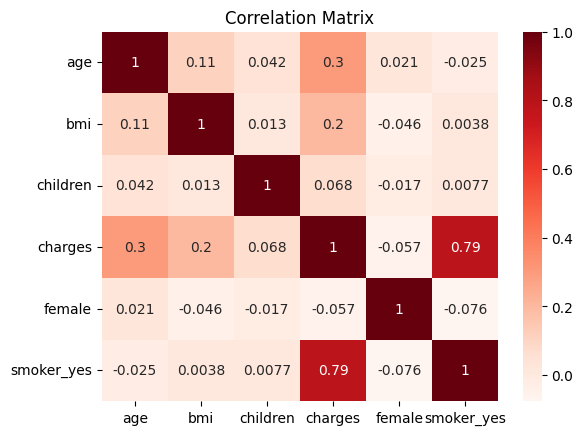

In [ ]:
# Heatmap

sns.heatmap(df.corr(numeric_only=True), cmap= 'Reds', annot= True)
plt.title('Correlation Matrix')

In [ ]:
### Final Heatmap (after variable transformation, One-Hot Encoder, creation of new variables and scaling)

In [ ]:
# Variable Transformation

df=pd.read_csv("insurance.csv")
df.head()
df['female'] = df['sex'].apply(lambda x: 1 if x=='female' else 0)
df['smoker_yes'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)
df.drop(['sex', 'smoker'], axis=1, inplace=True)


In [ ]:

bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ["Bajo Peso", "Peso Normal", "Sobrepeso", "Obesidad"]
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

In [ ]:
df

,age,bmi,children,region,charges,female,smoker_yes,bmi_category
0,19,27.900,0,southwest,16884.92400,1,1,Sobrepeso
1,18,33.770,1,southeast,1725.55230,0,0,Obesidad
2,28,33.000,3,southeast,4449.46200,0,0,Obesidad
3,33,22.705,0,northwest,21984.47061,0,0,Peso Normal
4,32,28.880,0,northwest,3866.85520,0,0,Sobrepeso
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,0,Obesidad
1334,18,31.920,0,northeast,2205.98080,1,0,Obesidad
1335,18,36.850,0,southeast,1629.83350,1,0,Obesidad
1336,21,25.800,0,southwest,2007.94500,1,0,Sobrepeso


In [ ]:
# One-Hot Encoder 

from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop=None) # drop='first' to avoid multicollinearity

# Transform the 'region' column
region_encoded = encoder.fit_transform(df[['region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=encoder.get_feature_names_out(['region']))

# Transform the 'bmi_category' column
bmi_encoded = encoder.fit_transform(df[['bmi_category']])
bmi_encoded_df = pd.DataFrame(bmi_encoded, columns=encoder.get_feature_names_out(['bmi_category']))

# Concatenate the new DataFrames with the original DataFrame
df = pd.concat([df, region_encoded_df, bmi_encoded_df], axis=1)

# Remove the original columns if necessary
df.drop(['region', 'bmi_category'], axis=1, inplace=True)


In [ ]:
df

,age,bmi,children,charges,female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Bajo Peso,bmi_category_Obesidad,bmi_category_Peso Normal,bmi_category_Sobrepeso
0,19,27.900,0,16884.92400,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,33.000,3,4449.46200,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,22.705,0,21984.47061,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,32,28.880,0,3866.85520,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,36.850,0,1629.83350,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,25.800,0,2007.94500,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


- I keep the 'underweight' category only for analysis purposes, but it should be removed to avoid multicollinearity. The 'BMI_underweight' column has been removed.

- **Removal of a Column to Avoid Multicollinearity**:
In the context of one-hot encoding, it is common to remove one of the resulting binary columns to avoid multicollinearity (or perfect collinearity). This is known as the dummy variable trap. Including all binary columns in the model would result in collinearity and lack of independence, which could lead to issues in estimating model coefficients.

In [ ]:
# Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Scale the selected columns
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])

df

,age,bmi,children,charges,female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Bajo Peso,bmi_category_Obesidad,bmi_category_Peso Normal,bmi_category_Sobrepeso
0,0.021739,0.321227,0.0,16884.92400,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,1725.55230,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0.458434,0.6,4449.46200,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0.0,21984.47061,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.304348,0.347592,0.0,3866.85520,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0.0,2205.98080,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,0.000000,0.562012,0.0,1629.83350,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,0.065217,0.264730,0.0,2007.94500,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Multiplying two or more continuous variables can help capture non-linear interactions between them. For example, if you want to capture the combined effect of Body Mass Index (BMI) and smoking status on insurance costs, you could create a new variable that is the product of BMI and a binary indicator of whether the person is a smoker or not.

Example: If bmi is the Body Mass Index variable and smoker_yes is a binary variable indicating whether a person is a smoker (1 for yes, 0 for no), you can create a new feature such as bmi_smoker_interaction that multiplies bmi by smoker_yes.

In [ ]:
# Creating new variables (columns)

df['bmi_smoker_interaction'] = df['bmi'] * df['smoker_yes']


In [ ]:
df.head()

,age,bmi,children,charges,female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Bajo Peso,bmi_category_Obesidad,bmi_category_Peso Normal,bmi_category_Sobrepeso,bmi_smoker_interaction
0,0.021739,0.321227,0.0,16884.92400,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.321227
1,0.000000,0.479150,0.2,1725.55230,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000
2,0.217391,0.458434,0.6,4449.46200,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000
3,0.326087,0.181464,0.0,21984.47061,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
4,0.304348,0.347592,0.0,3866.85520,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


Text(0.5, 1.0, 'Correlation Matrix')

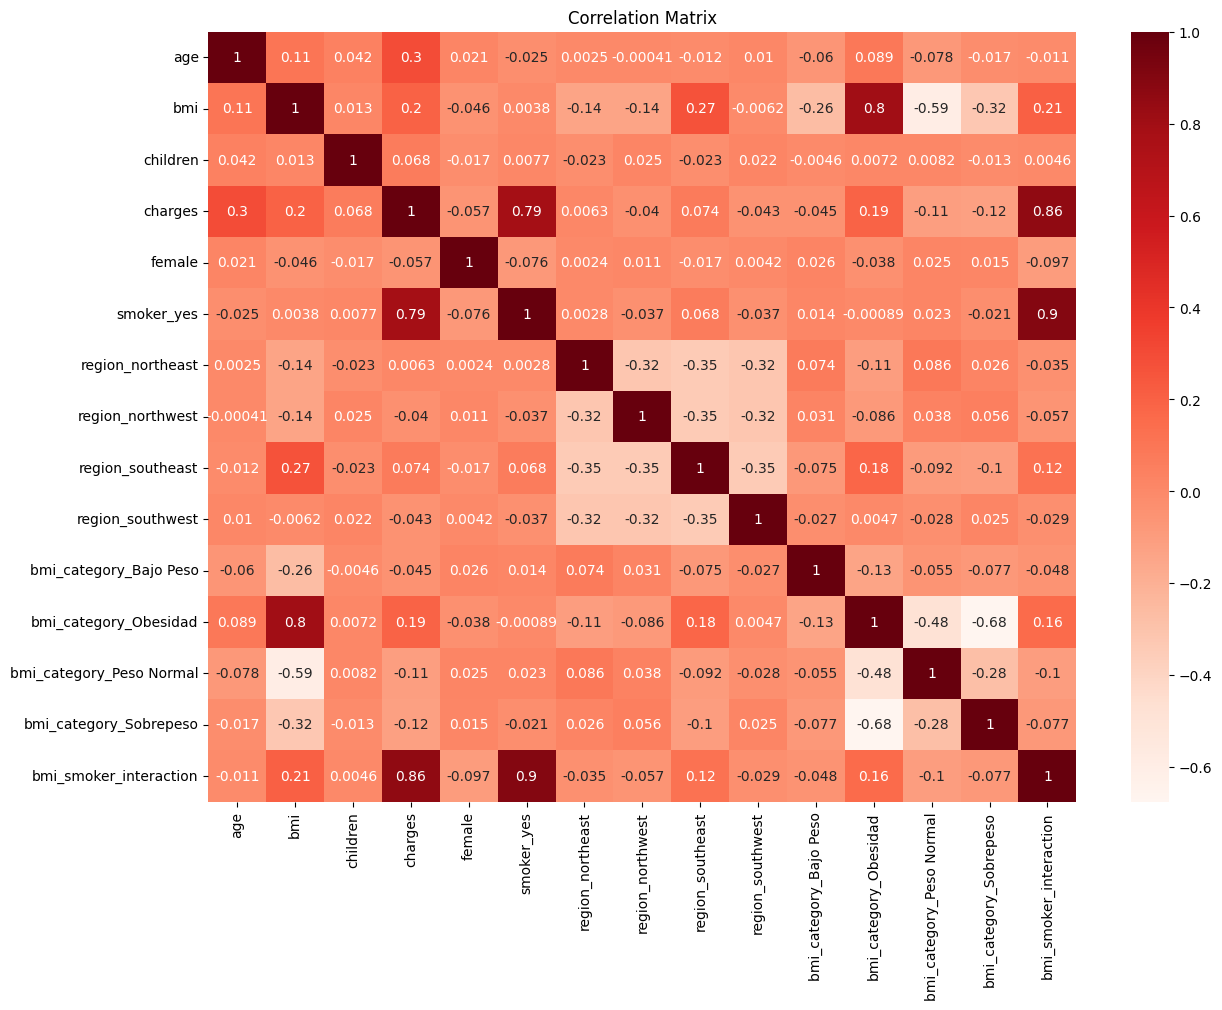

In [ ]:
# Heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap= 'Reds', annot= True)
plt.title('Correlation Matrix')
